## CART (Classification and Regression Trees)
## Random Forest

Here we will analyzes again the Ames Housing Data, this time using first a single decision tree
and later a Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.cross_validation import train_test_split

#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO
#import graphviz

/Applications/anaconda/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
datafile = "../02-regression_scrape/data/Ames_Housing_Data.tsv"

In [3]:
df = pd.read_csv(datafile,sep='\t')

In [4]:
# Preprocessing as we did last tiem

df = df.loc[df['Gr Liv Area']<=4000,:]
df= df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars','SalePrice']]
df = df.fillna(0)

In [5]:
df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900


In [6]:
df.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'SalePrice'],
      dtype='object')

In [7]:
feature_columns = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars']

y = df.loc[:,"SalePrice"]
X = df.loc[:,feature_columns]


In [8]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [9]:
## To start, we will build a single tree
from sklearn import tree

# Set some parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
dtrmodel.tree_

In [11]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [12]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="Overall Qual <= 7.5\nmse = 6032184943.25\nsamples = 2047\nvalue = 179343.2003"] ;
1 [label="Overall Qual <= 5.5\nmse = 2381604076.05\nsamples = 1722\nvalue = 156110.018"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Overall Qual <= 4.5\nmse = 1045455934.87\nsamples = 780\nvalue = 125499.9321"] ;
1 -> 2 ;
3 [label="Gr Liv Area <= 843.0\nmse = 1061232750.31\nsamples = 198\nvalue = 100637.8586"] ;
2 -> 3 ;
4 [label="Overall Qual <= 2.5\nmse = 475925001.778\nsamples = 43\nvalue = 71072.4186"] ;


In [13]:
# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

In [14]:
# Poke around inside the structure of the tree object
# Specifically, look at the "feature" and "threshold"
# These are indexed by the "node" of the tree.  First element is the root.
# Usually counts "depth first"

list(zip(dtrmodel.tree_.feature,dtrmodel.tree_.threshold))[:10]



[(1, 7.5),
 (1, 5.5),
 (1, 4.5),
 (5, 843.0),
 (1, 2.5),
 (-2, -2.0),
 (9, 0.5),
 (-2, -2.0),
 (-2, -2.0),
 (8, 0.5)]

In [15]:
# Look at "children_left" and "children_right"

list(zip(dtrmodel.tree_.children_left,dtrmodel.tree_.children_right))[:10]



[(1, 58),
 (2, 29),
 (3, 16),
 (4, 9),
 (5, 6),
 (-1, -1),
 (7, 8),
 (-1, -1),
 (-1, -1),
 (10, 13)]

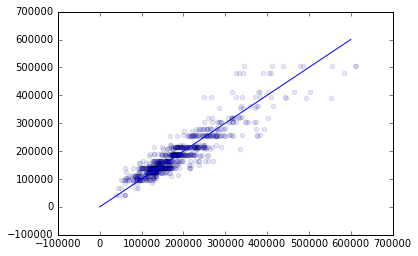

In [16]:
# Now let's predict on the test set and plot pred vs actual

tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))


## Comprehension question
Why do we see these horizontal "bands" in the predicted vs actual plot?

In [17]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((tree_pred_test - y_test)**2))

32681.238995996231

In [18]:
# Not bad for a single tree!  Let's try a Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

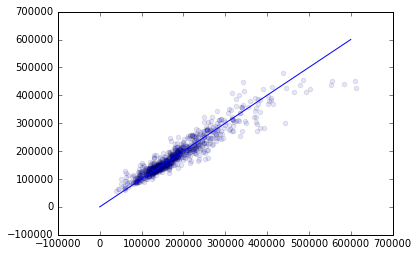

In [22]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))



In [23]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

25881.076596780207

In [24]:
## Even better!

## now create your own Random Forest model (rfmodel2), choose some new parameters
## e.g. max_features, min_leaf_size, min_sample_size

In [25]:
rfmodel2=RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1,  n_jobs=-1, max_features=4, min_impurity_split=300000) #Your parameters inside the parentheses
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=300000,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
rf2_test_pred = rfmodel2.predict(X_test)

In [27]:
np.sqrt(np.mean((rf2_test_pred - y_test)**2))

25109.36286024216

In [28]:
rfmodel2.max_features


4

In [29]:
rfmodel3=RandomForestRegressor(n_estimators = 600, min_samples_leaf=1,  n_jobs=-1, max_features='sqrt') #Your parameters inside the parentheses
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
rf3_test_pred = rfmodel3.predict(X_test)

In [31]:
np.sqrt(np.mean((rf3_test_pred - y_test)**2))

24861.479109734966